<a href="https://colab.research.google.com/github/Ernesto16/AI-Saturdays/blob/master/Week%2010%20Assessment/Week_10_Assessment_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🧠 Notes / Explanation

- **Dataset**: Breast Cancer Wisconsin (binary classification: malignant vs benign).  
- **Input layer**: Handled by `Input(shape=(n_features,))`.  
- **Hidden layers**: Two Dense layers with ReLU activation (64 and 32 units).  
- **Output layer**: Single unit with Sigmoid activation (for binary classification).  
- **Loss function**: `binary_crossentropy`.  
- **Optimizer**: Adam.  
- **Metrics**: Accuracy, Precision, Recall. Also report F1 score in final results.  
- **Splits**: Train/Validation/Test = 60% / 20% / 20%.  
- **Training**: 50 epochs, batch size 32 (adjust if under/overfitting observed).  

### 📊 Plots & Evaluation
Include:
- Training/Validation **loss and accuracy curves**
- **Confusion matrix**
- **Classification report** (precision, recall, f1-score)



In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [12]:
# Reproducibility
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)


# 2) Load dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names


print('Dataset shape:', X.shape)
print('Labels distribution:', np.bincount(y))


# 3) Train / Validation / Test split (60 / 20 / 20)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=SEED, stratify=y_train_val)
# note: 0.25 x 0.8 = 0.20 -> results in 60/20/20

print('Train:', X_train.shape, 'Val:', X_val.shape, 'Test:', X_test.shape)


# 3.1) Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

Dataset shape: (569, 30)
Labels distribution: [212 357]
Train: (341, 30) Val: (114, 30) Test: (114, 30)


In [13]:
# 4) Build model
input_shape = X_train.shape[1]


model = keras.Sequential([
layers.Input(shape=(input_shape,)),
layers.Dense(64, activation='relu', name='dense_1'),
layers.Dense(32, activation='relu', name='dense_2'),
layers.Dense(1, activation='sigmoid', name='output')
])


model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# 5) Compile model
model.compile(
optimizer=keras.optimizers.Adam(),
loss=keras.losses.BinaryCrossentropy(),
metrics=['accuracy', keras.metrics.Precision(name='precision'), keras.metrics.Recall(name='recall')]
)


# 6) Train
EPOCHS = 50
BATCH_SIZE = 32


history = model.fit(
X_train, y_train,
validation_data=(X_val, y_val),
epochs=EPOCHS,
batch_size=BATCH_SIZE,
verbose=2
)

Epoch 1/50
11/11 - 2s - 194ms/step - accuracy: 0.8211 - loss: 0.4993 - precision: 0.8097 - recall: 0.9346 - val_accuracy: 0.9211 - val_loss: 0.3691 - val_precision: 0.9189 - val_recall: 0.9577
Epoch 2/50
11/11 - 0s - 13ms/step - accuracy: 0.9443 - loss: 0.2969 - precision: 0.9295 - recall: 0.9860 - val_accuracy: 0.9474 - val_loss: 0.2394 - val_precision: 0.9452 - val_recall: 0.9718
Epoch 3/50
11/11 - 0s - 12ms/step - accuracy: 0.9501 - loss: 0.1969 - precision: 0.9417 - recall: 0.9813 - val_accuracy: 0.9561 - val_loss: 0.1748 - val_precision: 0.9459 - val_recall: 0.9859
Epoch 4/50
11/11 - 0s - 13ms/step - accuracy: 0.9560 - loss: 0.1458 - precision: 0.9462 - recall: 0.9860 - val_accuracy: 0.9561 - val_loss: 0.1411 - val_precision: 0.9459 - val_recall: 0.9859
Epoch 5/50
11/11 - 0s - 14ms/step - accuracy: 0.9619 - loss: 0.1174 - precision: 0.9548 - recall: 0.9860 - val_accuracy: 0.9649 - val_loss: 0.1209 - val_precision: 0.9589 - val_recall: 0.9859
Epoch 6/50
11/11 - 0s - 12ms/step - acc

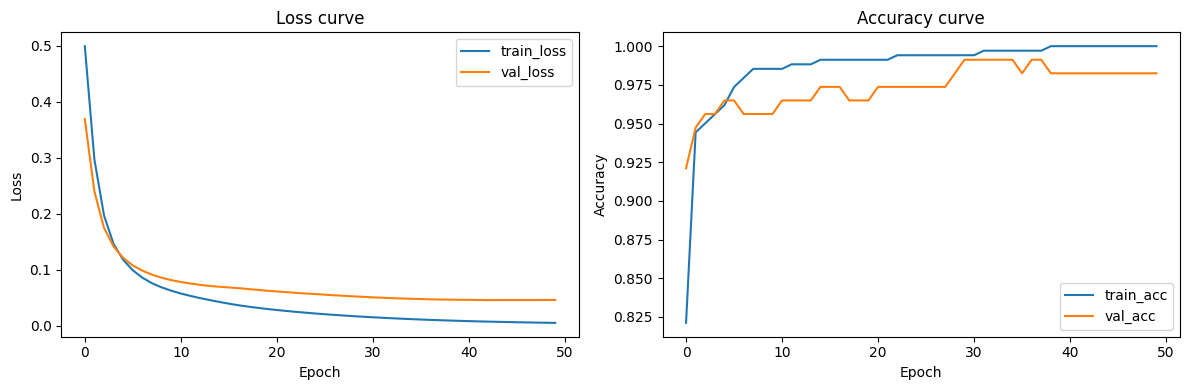

In [15]:
# 7) Plot training curves
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss curve')


plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy curve')


plt.tight_layout()
plt.show()

In [16]:
# 8) Evaluate on test set
test_results = model.evaluate(X_test, y_test, verbose=0)
print('\nTest results (loss, accuracy, precision, recall):', test_results)


# 8.1) Detailed metrics
y_pred_prob = model.predict(X_test).ravel()
y_pred = (y_pred_prob >= 0.5).astype(int)


print('\nConfusion matrix:\n', confusion_matrix(y_test, y_pred))
print('\nClassification report:\n', classification_report(y_test, y_pred, digits=4))


acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


print(f'Accuracy: {acc:.4f} Precision: {prec:.4f} Recall: {rec:.4f} F1: {f1:.4f}')


Test results (loss, accuracy, precision, recall): [0.10774634778499603, 0.9473684430122375, 0.9852941036224365, 0.9305555820465088]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Confusion matrix:
 [[41  1]
 [ 5 67]]

Classification report:
               precision    recall  f1-score   support

           0     0.8913    0.9762    0.9318        42
           1     0.9853    0.9306    0.9571        72

    accuracy                         0.9474       114
   macro avg     0.9383    0.9534    0.9445       114
weighted avg     0.9507    0.9474    0.9478       114

Accuracy: 0.9474 Precision: 0.9853 Recall: 0.9306 F1: 0.9571


In [17]:
# 9) Save model
model.save("model.keras")